## Регрессионный анализ

### Подключение библиотек

Используемые библиотеки:
numpy - для массивов
sklearn - для регрессии
matplotlib - для базовых графиков
pandas - для таблиц
seaborn - для красивых графиков

In [12]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Осмотр данных

В массиве x хранятся значения независимой переменной
В массиве y - зависимой переменной

In [13]:
x = np.array([
    15, 26, 65, 320, 652, 156, 896, 123, 16, 263, 459, 213
], dtype=int)

y = np.array([
    125, 163, 162, 263, 563, 23, 463, 126, 133, 152, 213, 159
], dtype=int)

Составление точечного графика для осмотра имеющихся данных

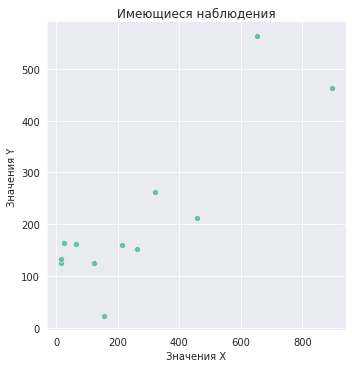

In [14]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.relplot(x=x, y=y)
plt.title('Имеющиеся наблюдения')
plt.xlabel('Значения X')
plt.ylabel('Значения Y')
plt.show()


### Подсчёт регрессии вручную

Создание таблицы на основе имеющихся массивов, для дальнейшего использования при построении графиков

In [27]:
dataframe = pd.DataFrame(data={
    "X": x,
    "Y": y,
})

Построение графика с линиями на основе имеющихся данных, для их осмотра

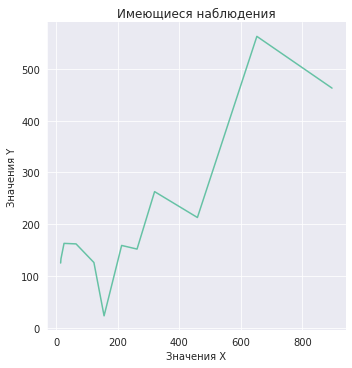

In [16]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.relplot(data=dataframe, x="X", y="Y", kind='line')
plt.title('Имеющиеся наблюдения')
plt.xlabel('Значения X')
plt.ylabel('Значения Y')
plt.show()

Составление графика корреляции

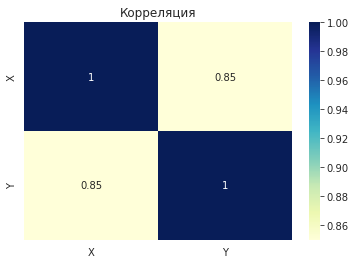

In [17]:
sns.heatmap(dataframe.corr(), cmap="YlGnBu", annot=True)
plt.title('Корреляция')
plt.show()

Подсчёт некоторых параметров на основе имеющихся данных

In [18]:
mean_x = x.mean()  # Среднее значение x
mean_y = y.mean()  # Среднее значение y

variance_x = x.var()  # Дисперсия случайной величины x
variance_y = y.var()  # Дисперсия случайной величины y

xy = 0
for index in range(len(x)):
    xy += x[index] * y[index]
xy = xy / len(x)  # Переменная xy

b = (xy - mean_x * mean_y) / variance_x  # Свободный член А
a = mean_y - b * mean_x  # Коэффициент B

r_xy = (xy - mean_x * mean_y) / ((variance_x * variance_y) ** (1 / 2))  # Коэффициент корреляции

s_e = 0
for index in range(len(x)):
    s_e += ((y[index] - (a + b * x[index])) ** 2)
s_e = ((1 / (len(x) - 1)) * s_e) ** (1 / 2)  # Стандартная ошибка остаточной компоненты

delta_a = 0
temporary_a = 0
temporary_b = 0
for index in range(len(x)):
    temporary_a += (x[index]) ** 2
    temporary_b += (x[index] - mean_x) ** 2
delta_a = s_e * ((temporary_a / (len(x) * temporary_b)) ** (1 / 2))  # Средне квадратичная (стандартная) ошибка a

delta_b = (s_e ** 2) / (temporary_b ** (1 / 2))  # Средне квадратичная (стандартная) ошибка b

t_a = a / delta_a  # Критерий Стьюдента для свободного члена a
t_b = b / delta_b  # Критерий Стьюдента для коэффициента b

Составление и вывод таблицы содержащей все подсчитанные параметры, для наглядности

In [19]:
options = pd.DataFrame(data={
    "Среднее значение X": [mean_x],
    "Среднее значение Y": [mean_y],
    "Дисперсия случайной величины X": [variance_x],
    "Дисперсия случайной величины Y": [variance_y],
    "Свободный член a": [a],
    "Коэффициент b": [b],
    "Переменная XY": [xy],
    "Коэффициент корреляции": [r_xy],
    "Стандартная ошибка остаточной компоненты": [s_e],
    "Средне квадратичная (стандартная) ошибка a": [delta_a],
    "Средне квадратичная (стандартная) ошибка b": [delta_b],
    "Критерий Стьюдента для свободного члена a": [t_a],
    "Критерий Стьюдента для коэффициента b": [t_b]
})

options.head()

,Среднее значение X,Среднее значение Y,Дисперсия случайной величины X,Дисперсия случайной величины Y,Свободный член a,Коэффициент b,Переменная XY,Коэффициент корреляции,Стандартная ошибка остаточной компоненты,Средне квадратичная (стандартная) ошибка a,Средне квадратичная (стандартная) ошибка b,Критерий Стьюдента для свободного члена a,Критерий Стьюдента для коэффициента b
0,267.0,212.083333,70409.833333,21420.076389,86.933186,0.468727,89629.25,0.849819,80.570745,32.995388,7.062321,2.634707,0.06637


Вывод полученной формулы

In [20]:
print(f"Формула регрессии: \n{a} + ({b} * x)")

Формула регрессии: 
86.93318621846538 + (0.4687271427523145 * x)


Составление таблицы с предсказаниями значения y на основе полученного уравнения

In [21]:
result = []
for i in x:
    result.append(a + b * i)
result = np.array(result)

### Подсчёт регрессии с помощью sklearn

Использование готового класса Ridge из библиотеки sklearn, для автоматизированного подсчёта регрессии

In [22]:
regression = Ridge(alpha=0.02)
regression.fit(x.reshape(-1, 1), y.reshape(-1, 1))
print(f'Среднеквадратическая ошибка = {np.mean((regression.predict(x.reshape(-1, 1)) - y) ** 2)}')

Среднеквадратическая ошибка = 36889.477548793104


### Проверка результатов

# New Section

Построение новой таблицы, для графиков расположенных ниже

In [28]:
results = pd.DataFrame(data={
    "X": x,
    "Эталон": y,
    "Предсказание": result,
    "Sklearn": regression.predict(x.reshape(-1, 1)).reshape(len(x),)
})
row_1 = np.array((results.X, results.X, results.X)).reshape(len(x) * 3,)
row_2 = np.array((results.Эталон, results["Предсказание"], results.Sklearn)).reshape(len(x) * 3,)
row_3 = np.array(())
for _ in range(len(x)):
    row_3 = np.append(row_3, "Эталон")
for _ in range(len(x)):
    row_3 = np.append(row_3, "Предсказание")
for _ in range(len(x)):
    row_3 = np.append(row_3, "Sklearn")

data_for_plot = pd.DataFrame(data={
    "X": row_1,
    "Y": row_2,
    "Тип": row_3,
})

Построения графика на котором отображены:
Исходные данные - сплошная синяя линия
Линия тренда составленная вручную - фиолетовая штриховая линия
Линия тренда составленная sklearn - розовая пунктирная линия

Линии могут накладываться друг на друга

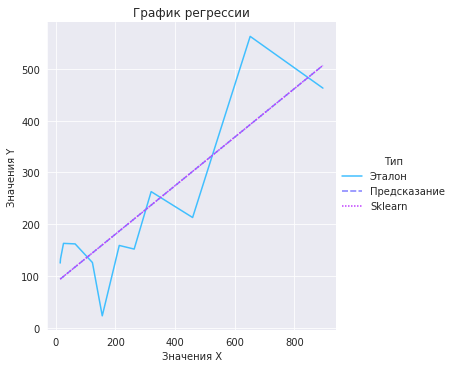

In [29]:
sns.relplot(
    data=data_for_plot,
    x="X",
    y="Y",
    hue="Тип",
    style="Тип",
    height=5,
    aspect=1,
    kind="line",
    palette="cool"
).set(
    title="График регрессии",
    ylabel="Значения Y",
    xlabel="Значения X"
)

Те же данные, но каждая линия на отдельном графике

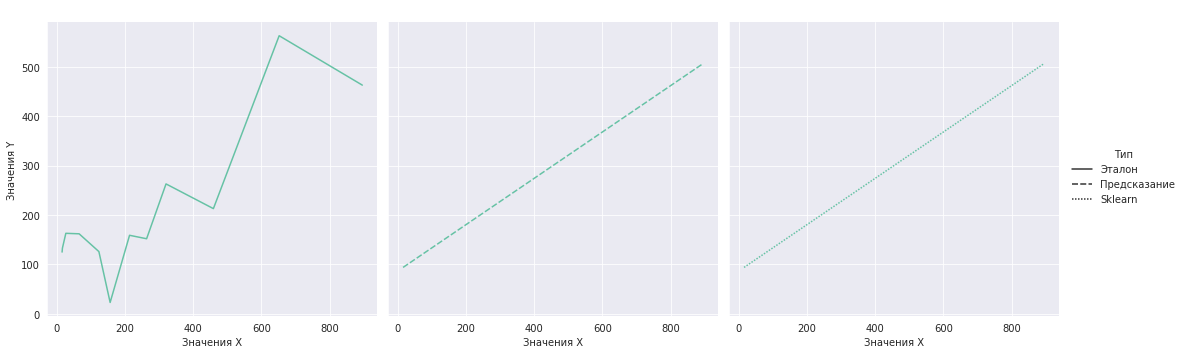

In [30]:
sns.relplot(
    data=data_for_plot,
    x="X",
    y="Y",
    col = "Тип",
    style="Тип",
    height=5,
    aspect=1,
    kind="line",
).set(
    title=" ",
    ylabel="Значения Y",
    xlabel="Значения X"
)

Табличное представление результатов предсказаний

In [31]:
results

,X,Эталон,Предсказание,Sklearn
0,15,125,93.964093,93.964096
1,26,163,99.120092,99.120095
2,65,162,117.400450,117.400453
3,320,263,236.925872,236.925871
4,652,563,392.543283,392.543279
5,156,23,160.054620,160.054622
6,896,463,506.912706,506.912699
7,123,126,144.586625,144.586626
8,16,133,94.432821,94.432823
9,263,152,210.208425,210.208425
